In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import f1_score

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, minmax_scale


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  



In [18]:
data = pd.read_csv('train.csv')

data.info()
data.head()

del data["Track Name"]
del data["Artist Name"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [19]:
null_feats = pd.DataFrame(data.isnull().sum(), columns = ['nans']).sort_values('nans', ascending = False)
null_feats['nans %'] = np.round(data.isnull().sum() / data.shape[0], 2)
null_feats.head()

,nans,nans %
instrumentalness,4377,0.24
key,2014,0.11
Popularity,428,0.02
danceability,0,0.00
energy,0,0.00


In [20]:
nulls = null_feats.index[:3]
data[nulls].describe()

,instrumentalness,key,Popularity
count,13619.000000,15982.000000,17568.000000
mean,0.177562,5.952447,44.512124
std,0.304048,3.196854,17.426928
min,0.000001,1.000000,1.000000
25%,0.000089,3.000000,33.000000
50%,0.003910,6.000000,44.000000
75%,0.200000,9.000000,56.000000
max,0.996000,11.000000,100.000000


In [21]:
data[nulls] = data[nulls].fillna(data[nulls].mean())
data.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [22]:
#Normaize

for column in data.columns.values:
    if(column == 'Class'):
        continue
    data[column] = minmax_scale(data[column], feature_range=(0,1), axis=0)

data.head()


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0.595960,0.854745,0.563991,0.0,0.847024,1.0,0.027882,0.017169,0.178274,0.073879,0.910096,0.553969,0.158812,0.75,5
1,0.535354,0.346890,0.813996,0.2,0.792166,1.0,0.019410,0.001104,0.004025,0.090173,0.569081,0.459689,0.170413,0.75,10
2,0.343434,0.402841,0.613992,0.5,0.765439,1.0,0.032172,0.487952,0.000196,0.386702,0.794358,0.626804,0.074240,0.75,6
3,0.656566,0.853669,0.596992,0.9,0.809161,0.0,0.035389,0.021285,0.178274,0.111426,0.569081,0.409271,0.117769,0.75,5
4,0.525253,0.115558,0.974999,0.1,0.863607,1.0,0.207507,0.000170,0.016164,0.162028,0.075953,0.901766,0.155674,0.75,10


In [23]:
# hesaplanmasını istediğimiz değişkenleri agg fonksiyonu içine atıyoruz.
data.agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
mad,0.137486,0.143505,0.193627,0.245154,0.071389,0.462597,0.057392,0.261377,0.183082,0.117433,0.208814,0.129381,0.051170,0.040789,2.751865
mean,0.439516,0.520587,0.662770,0.495245,0.775688,0.636753,0.061348,0.248074,0.178274,0.186489,0.483526,0.492705,0.135896,0.731010,6.695821
median,0.434343,0.522272,0.699994,0.495245,0.797347,1.000000,0.026702,0.081727,0.050049,0.118510,0.478144,0.479016,0.141593,0.750000,8.000000
quantile,0.434343,0.522272,0.699994,0.495245,0.797347,1.000000,0.026702,0.081727,0.050049,0.118510,0.478144,0.479016,0.141593,0.750000,8.000000
kurt,-0.147601,-0.283735,-0.316936,-0.989426,5.037741,-1.676719,12.668128,-0.179139,1.917552,5.633397,-0.915963,-0.447204,8.666494,27.887489,-0.846330
skew,0.076622,-0.083522,-0.661169,-0.058357,-1.761383,-0.568742,3.088002,1.105497,1.759846,2.176072,0.089928,0.379619,0.846930,-4.182715,-0.666686
var,0.030249,0.032005,0.055403,0.090761,0.009609,0.231312,0.008033,0.097269,0.070523,0.025963,0.061609,0.025045,0.005748,0.008173,10.278907


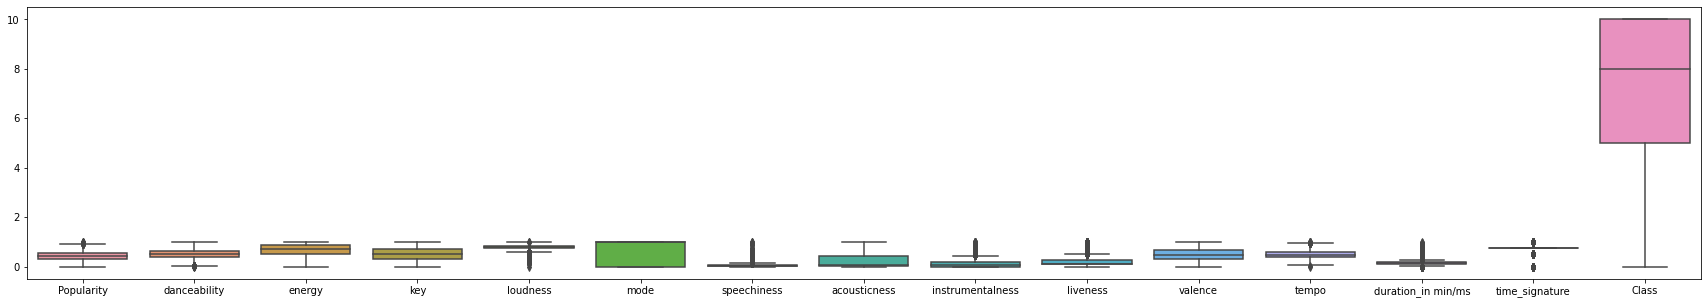

In [24]:
plt.figure(figsize=(30,5))
sns.boxplot(data=data)
plt.show()

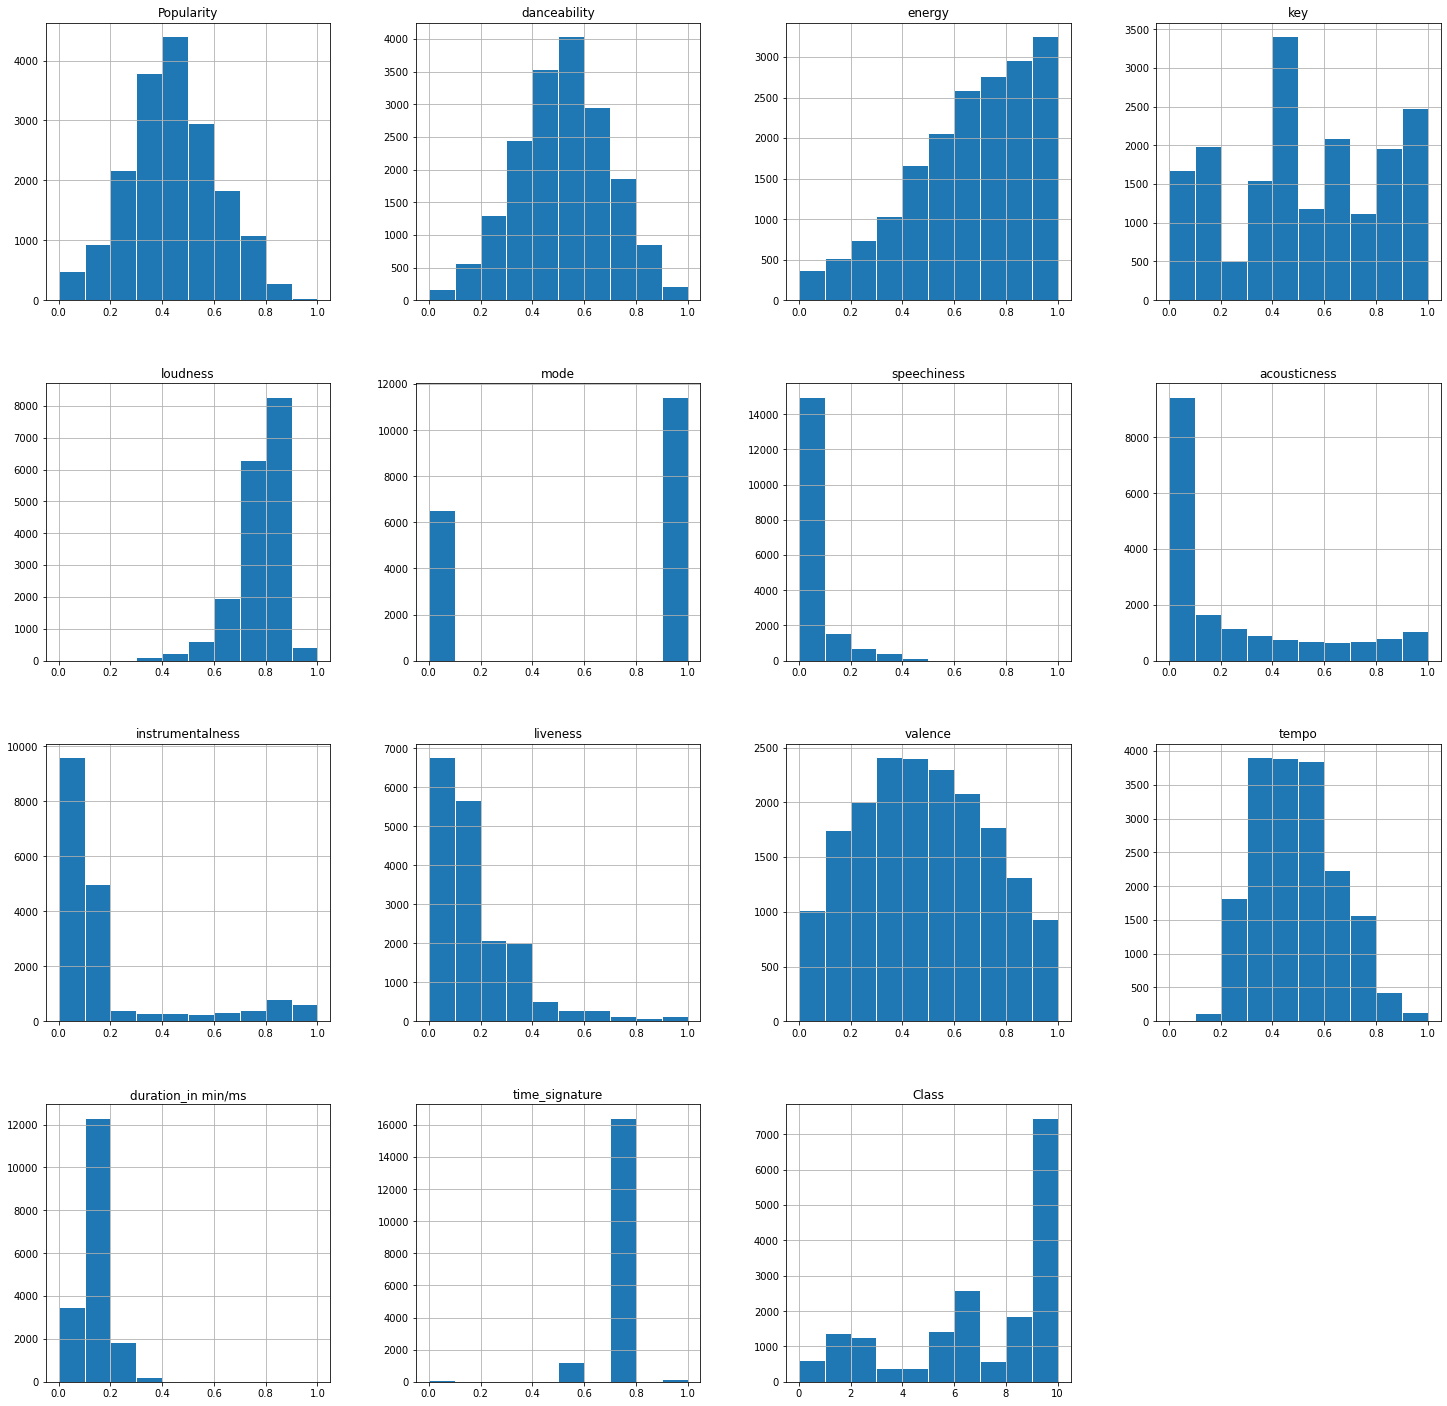

In [25]:
data.hist(figsize=(25,25), ec='w')
plt.show()

In [26]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
data.corr().style.applymap(color_)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Popularity,1.000000,0.165462,0.050696,0.005471,0.122269,0.016398,0.031305,-0.123409,-0.137549,-0.071693,0.054106,-0.005974,-0.030500,0.066188,0.158278
danceability,0.165462,1.000000,-0.093838,0.006319,0.059723,-0.067135,0.199042,0.009055,-0.174594,-0.109485,0.444548,-0.183527,-0.121624,0.137455,-0.097681
energy,0.050696,-0.093838,1.000000,0.014953,0.767869,-0.035880,0.125427,-0.745963,-0.162967,0.195634,0.222998,0.210224,0.245768,0.145281,0.217328
key,0.005471,0.006319,0.014953,1.000000,0.002493,-0.107048,0.001739,-0.008576,0.001169,0.014074,0.029887,0.013144,0.013670,0.006514,-0.007357
loudness,0.122269,0.059723,0.767869,0.002493,1.000000,-0.033650,0.096027,-0.612824,-0.318254,0.112022,0.181086,0.164272,0.172010,0.127775,0.177872
mode,0.016398,-0.067135,-0.035880,-0.107048,-0.033650,1.000000,-0.074609,0.024035,-0.023207,-0.001563,-0.002986,0.021211,-0.069307,-0.019989,-0.044740
speechiness,0.031305,0.199042,0.125427,0.001739,0.096027,-0.074609,1.000000,-0.086648,-0.046984,0.070406,0.053885,0.048948,0.005044,0.056237,-0.059349
acousticness,-0.123409,0.009055,-0.745963,-0.008576,-0.612824,0.024035,-0.086648,1.000000,0.156548,-0.111393,-0.122547,-0.168318,-0.322583,-0.133936,-0.237138
instrumentalness,-0.137549,-0.174594,-0.162967,0.001169,-0.318254,-0.023207,-0.046984,0.156548,1.000000,-0.041528,-0.202680,-0.033423,-0.004130,-0.057368,-0.022491
liveness,-0.071693,-0.109485,0.195634,0.014074,0.112022,-0.001563,0.070406,-0.111393,-0.041528,1.000000,0.021076,0.033515,0.053885,0.021546,0.045309


Class Distributions: Counter({10: 4949, 6: 2587, 9: 2524, 8: 1854, 5: 1447, 1: 1373, 2: 1272, 0: 625, 7: 576, 3: 402, 4: 387})


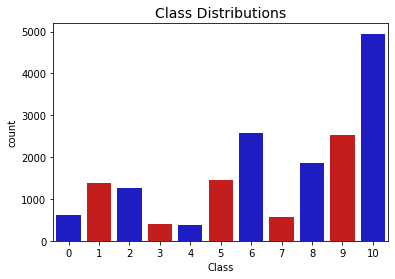

In [27]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions', fontsize=14)

print('Class Distributions:', Counter(data["Class"]))

In [28]:
# There is 3684 fraud processes.
X = data.drop('Class', axis=1)
y = data['Class']

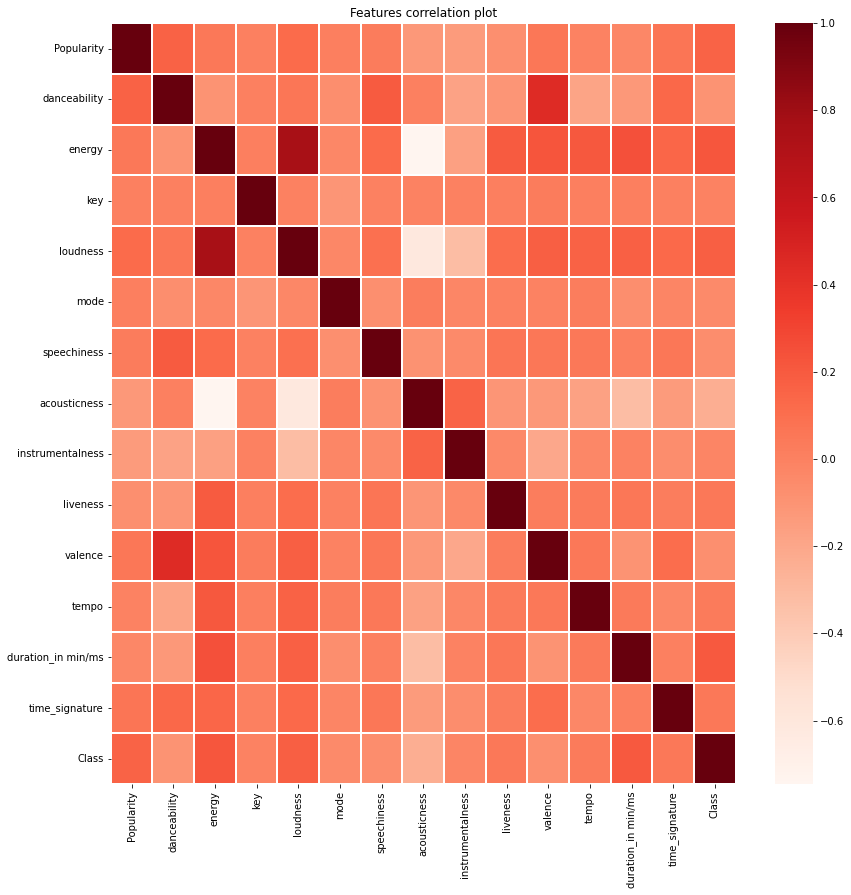

In [29]:
plt.figure(figsize = (14,14))
plt.title('Features correlation plot')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [30]:
#Split into train, test and validation data

train_df, test_df = train_test_split(data, test_size=30, random_state=42, shuffle=True)

trainX = train_df.drop('Class', axis=1)
trainy = train_df['Class']

testX = test_df.drop('Class', axis=1)
testy = test_df['Class']


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import backend as K

#Classification metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()

col_length = trainX.shape[1]

model.add(Dense(20, input_dim=col_length, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', recall_m, precision_m, f1_m])

model.fit(trainX, trainy, epochs=150, batch_size=10, verbose=True)

_, accuracy, recall, precision, f1_score = model.evaluate(testX, testy)

print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))
print('Precision: %.2f' % (precision*100))
print('F1-Score: %.2f' % (f1_score*100))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 20)                300       
                                                                 
 dense_22 (Dense)            (None, 10)                210       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
1797/1797 [==============================] - 3s 1ms/step - loss: -78.6025 - accuracy: 0.0750 - recall_m: 0.9788 - precision_m: 2259321.0000 - f1_m: 0.9921
Epoch 2/150
1797/1797 [==============================] - 2s 1ms/step - loss: -86.8789 - accuracy: 0.0763 - recall_m: 1.0000 - precision_m: 0.9652 - f1_m: